In [4]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import pytesseract
import mysql.connector
from datetime import datetime

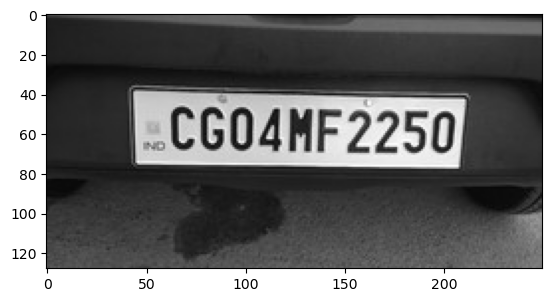

In [5]:
img = cv2.imread('image7.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))
plt.show()

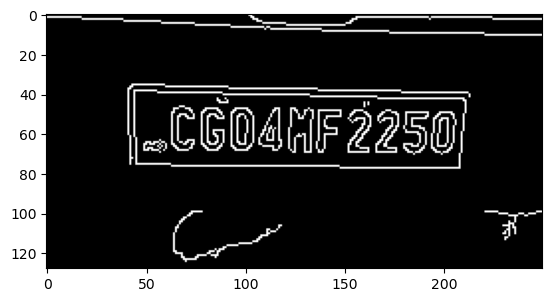

In [6]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #Noise reduction
edged = cv2.Canny(bfilter, 30, 200) #Edge detection
plt.imshow(cv2.cvtColor(edged,cv2.COLOR_BGR2RGB))
plt.show()

In [7]:
keypoints = cv2.findContours(edged.copy(), cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [8]:
location = None
for contour in contours:
 approx = cv2.approxPolyDP(contour, 10, True)
 if len(approx) == 4:
  location = approx
  break

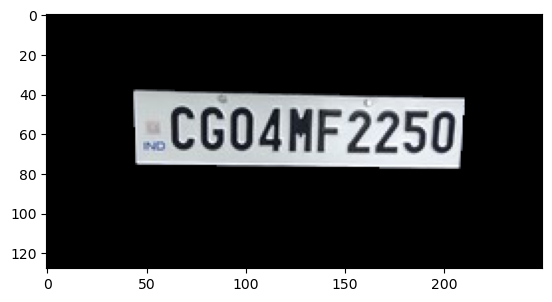

In [9]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0,255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))
plt.show()

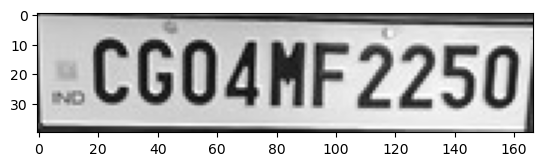

In [10]:

(x,y) = np.where(mask==255)
(x1, y1) = (np.min(x), np.min(y))
(x2, y2) = (np.max(x), np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
plt.show()



In [11]:

pytesseract.pytesseract.tesseract_cmd = r'C:\Users\Nidhi Gupta\AppData\Local\Programs\Tesseract-OCR\tesseract.exe'
text = pytesseract.image_to_string(cropped_image, lang='eng')
e = "".join(e for e in text if (e.isalnum()))
print("Car Number is:")
print(e)

Car Number is:
CG04MF2250


In [12]:
mydb = mysql.connector.connect(
host="localhost",
user="root",
password="12345",
database="cars"
)

mycursor = mydb.cursor()
sql = "INSERT INTO data (car_number, entry_time) VALUES (%s, %s)"
now = datetime.now()
print("Entry time is:")
time = now.time()
print("{:02d}:{:02d}".format(time.hour, time.minute))
print(time)
val = (e , now)
mycursor.execute(sql, val)
mydb.commit()


Entry time is:
16:47
16:47:42.326097


In [13]:
query="select * from data"
query2= "SELECT COUNT(DISTINCT car_number) FROM data"
mycursor.execute(query2)
rows=mycursor.fetchall()

print("Total count of cars is:")

for row in rows:
    for col in row:
        count_of_cars = int(col)  # Convert the value to an integer
        print(count_of_cars)
        break
    break


Total count of cars is:
1
